In [173]:
import librosa
from skimage import feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.feature import match_template

In [197]:
from scipy.signal import butter, sosfilt, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [4]:
(sig, rate) = librosa.load('VP2_20170330.wav', sr=22050, mono=False)

In [5]:
rate

22050

In [6]:
sig.shape

(2, 154253333)

Erste Kanal genommen

In [ ]:
sig1=sig[0,:]

Erster Fund im Abschnitt bei Sekunde 12 - Abschnittlänge 5 Sekunden

In [550]:
t_begin=12; t_end=t_begin+5

In [551]:
index_begin=t_begin*rate; index_end=t_end*rate;

In [552]:
segment=sig1[index_begin:index_end]

In [553]:
filtered=butter_bandpass_filter(segment, 200, 500, fs=rate, order=5)

In [554]:
fs=rate
windowlength=1024
mywindow=signal.get_window('hamming',windowlength)
f, t, Sxx = signal.stft(filtered, fs,window=mywindow,noverlap=800,nfft=windowlength,nperseg=windowlength)
Sxx.shape
#Syy=20*np.log10(np.abs(Sxx)/0.00002)
Syy=abs(Sxx)
print(Syy.shape)
print ('Freq resolution:', f[1], 'Time Resolution:', t[1])

(513, 494)
Freq resolution: 21.533203125 Time Resolution: 0.010158730158730155


In [555]:
print(Syy.shape, f.shape, t.shape)

(513, 494) (513,) (494,)


Text(0.5, 0, 'Time [sec]')

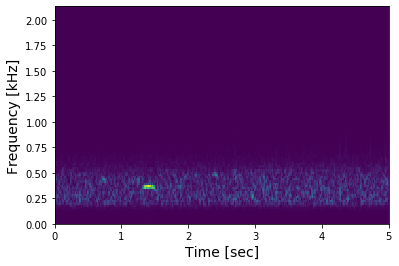

In [556]:
plt.pcolormesh(t[:],f[:100]/1e3,Syy[:100,:])
plt.ylabel('Frequency [kHz]', fontsize=14)
plt.xlabel('Time [sec]',fontsize=14)

Das Muster wurde vom ersten Fund genommen

In [475]:
Template=Syy[:50,120:160]
Template.shape

(50, 40)

In [456]:
Template=Template-Template.max()+100 #Normalisierung

In [457]:
Template.max()

100.0

Text(0.5, 0, 'Time [sec]')

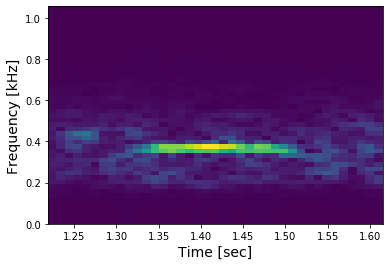

In [476]:
plt.pcolormesh(t[120:160],f[:50]/1e3,Template[:50,:])
plt.ylabel('Frequency [kHz]', fontsize=14)
plt.xlabel('Time [sec]',fontsize=14)

Zweiter Abschnitt (Fund) bei Sekunde 28 (und Template Matching mit dem)

In [557]:
t_begin=28; t_end=t_begin+5
index_begin=t_begin*rate; index_end=t_end*rate;
segment=sig1[index_begin:index_end]
filtered=butter_bandpass_filter(segment, 200, 500, fs=rate, order=5)

In [558]:
f, t, Sxx = signal.stft(filtered, fs,window=mywindow,noverlap=800,nfft=windowlength,nperseg=windowlength)
#Syy=20*np.log10(np.abs(Sxx)/0.00002)
Syy=abs(Sxx)
print(Syy.shape)

(513, 494)


Text(0.5, 0, 'Time [sec]')

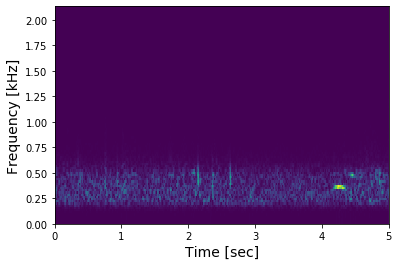

In [559]:
plt.pcolormesh(t[:],f[:100]/1e3,Syy[:100,:])
plt.ylabel('Frequency [kHz]', fontsize=14)
plt.xlabel('Time [sec]',fontsize=14)

Template Matching

In [561]:
result2 = match_template(Syy[:50,:], Template)
result2.shape

(1, 455)

In [570]:
np.flip(np.sort(result2))[0,:10] # Erste zehn maximalen Werte des Ergebnisses des Template Matching

array([0.87285325, 0.8695349 , 0.8615372 , 0.85425049, 0.83575668,
       0.83261259, 0.81887765, 0.80746937, 0.78446245, 0.76888596])

Template Matching mit einem falschen Positive Ergebnis <br>
z.B. der Abschnitt bei Sekunde 3084 mit Hundebellen bei ~500 Hz

In [578]:
t_begin=3084; t_end=t_begin+5
index_begin=t_begin*rate; index_end=t_end*rate;
segment=sig1[index_begin:index_end]
filtered=butter_bandpass_filter(segment, 200, 700, fs=rate, order=5)

In [579]:
f, t, Sxx = signal.stft(filtered, fs,window=mywindow,noverlap=800,nfft=windowlength,nperseg=windowlength)
#Syy=20*np.log10(np.abs(Sxx)/0.00002)
Syy=abs(Sxx)
print(Syy.shape)

(513, 494)


Text(0.5, 0, 'Time [sec]')

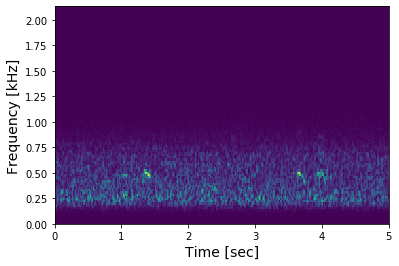

In [580]:
plt.pcolormesh(t[:],f[:100]/1e3,Syy[:100,:])
plt.ylabel('Frequency [kHz]', fontsize=14)
plt.xlabel('Time [sec]',fontsize=14)

In [581]:
result2 = match_template(Syy[:50,:], Template)
result2.shape
np.flip(np.sort(result2))[0,:10] # Erste zehn maximalen Werte des Ergebnisses des Template Matchings

array([0.48803274, 0.48576265, 0.48187312, 0.47971777, 0.4784014 ,
       0.4762246 , 0.47203579, 0.46874998, 0.46708229, 0.4633839 ])